## Mansi Saxena
### TASK 7 : STOCK PRICE PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn .preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-12-10')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2020-12-04,122.860001,121.519997,122.599998,122.250000,78260400.0,122.250000
2020-12-07,124.570000,122.250000,122.309998,123.750000,86712000.0,123.750000
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997


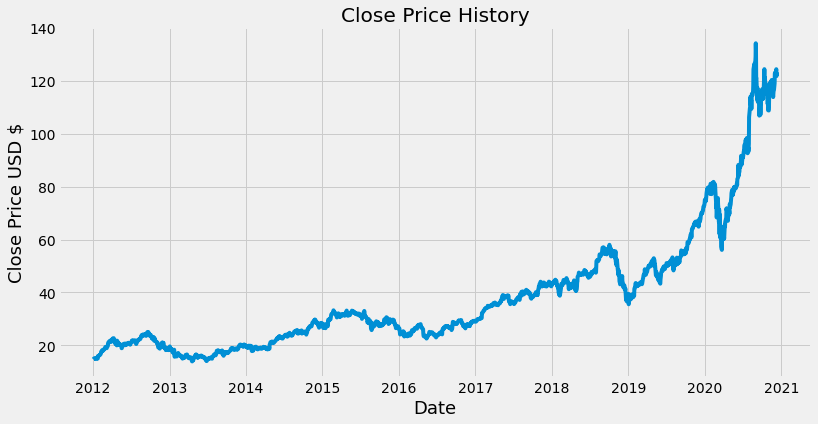

In [4]:
#Visualize the closing price history
plt.figure(figsize=(12,6))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD $',fontsize=18)
plt.show()

In [5]:
#create df with only close col
data=df.filter(['Close'])
#convert df to numpy array
dataset=data.values
dataset.shape

(2251, 1)

In [6]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_df=scaler.fit_transform(dataset)

In [7]:
#get rows to make train data
train_size=math.ceil(len(scaled_df)*0.8)
train_data=scaled_df[:train_size,:]
#create train data
X_train=[]
y_train=[]
for i in range (60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(X_train)
        print(y_train)

[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.00884298, 0.01095496, 0.00887566,
       0.01667305, 0.01607006, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182525, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512387,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499022, 0.04593482, 0.04796363, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.0639921 , 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]
[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.008

In [8]:
#convert train in np array
X_train,y_train=np.array(X_train),np.array(y_train)

In [9]:
# reshape from 2D to 3D as lstm uses 3d arrays
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1741, 60, 1)

In [10]:
#Build LSTM model
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [11]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
#train the model
model.fit(X_train,y_train,batch_size=1,epochs=1)

1741/1741 [==============================] - 39s 21ms/step - loss: 0.0010


In [14]:
#create test data
test_data=scaled_df[train_size-60:,:]
#create x test y test
X_test=[]
y_test=dataset[train_size:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [15]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(450, 60, 1)

In [16]:
#get the model predicted values
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

In [17]:
#Get root squared mean error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.6391942003038196

C:\Users\Mansi Saxena\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


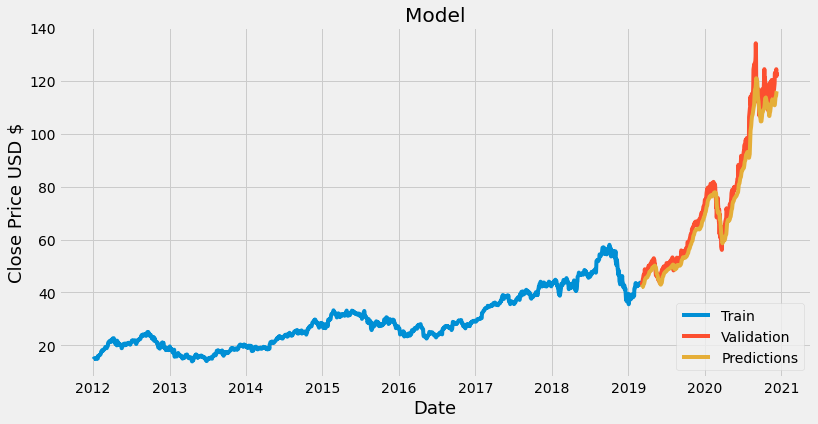

In [18]:
#plot the data
train=data[:train_size]
valid=data[train_size:]
valid['predictions']=predictions

#visualize the data
plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Validation','Predictions'],loc='lower right')
plt.show()

In [19]:
#show the actual and predicted price
valid

,Close,predictions
Date,,
2019-03-04,43.962502,41.881428
2019-03-05,43.882500,41.992897
2019-03-06,43.630001,42.093777
2019-03-07,43.125000,42.152687
2019-03-08,43.227501,42.131001
...,...,...
2020-12-04,122.250000,113.595825
2020-12-07,123.750000,114.356987
2020-12-08,124.379997,115.103905


In [20]:
#lets predict price for next day i.e.,01-01-2021
df_last_60=data[-60:].values
#scale
scaled_df_last_60=scaler.transform(df_last_60)
#append
x_test=[]
x_test.append(scaled_df_last_60)
#df to array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#predict
pred_price=model.predict(x_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[116.32236]]


In [21]:
df1=web.DataReader('AAPL',data_source='yahoo',start='2020-12-11',end='2020-12-11')
print(df1['Close'])

Date
2020-12-10    123.239998
2020-12-11    122.410004
Name: Close, dtype: float64
